# Project: Movie Recommadation

## Step 1: Extraction of data 

Extract data from Web Scarping of IMDB one of the most famous website for movies

#### Import library for web Scraping

In [1]:
from bs4 import BeautifulSoup 
import requests
import csv

In [2]:
# Define the number of pages you want to scrape
num_pages_to_scrape = 20

#### Extract data and save it in a csv file named as imbd_movies.csv

In [3]:
filename = "imdb_movies.csv"
headers = ["Name", "Year", "Runtime", "Genre", "Rating", "Votes", "Director", "Gross","MetaScore"]

with open(filename, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(headers)

    base_url = "https://www.imdb.com/search/title?title_type=feature&year=2000-01-01,2023-12-31&sort=num_votes,desc&start=0&ref_=adv_nxt"
    page_no = 0;
    for page_number in range(1, num_pages_to_scrape + 1):
        # Build the URL for the current page
        
        url = f"https://www.imdb.com/search/title/?title_type=feature&year=2000-01-01,2023-12-31&sort=num_votes,desc&start={page_no*50+1}&ref_=adv_nxt"
        page_no = page_no +1 
        # Send an HTTP request to the page
        response = requests.get(url)


        if response.status_code == 200:
            
            # Parse the HTML content
            page_soup = BeautifulSoup(response.text, 'html.parser')

            # Extract the containers (your code to do this)
            containers = page_soup.findAll("div",{"class":"lister-item mode-advanced"})


            for container in containers:

                # Extract Name
                name = container.find('img')['alt']

                # Extract year
                year_mov = container.find('span', {'class': 'lister-item-year'})
                year = year_mov.get_text(strip=True)

                # Extract Runtime
                runtime_mov = container.find('span', {'class': 'runtime'})
                if runtime_mov:
                    runtime = runtime_mov.get_text(strip=True)
                else:
                    runtime = ""


                # Extract Genre
                genre_mov = container.find('span', {'class': 'genre'})
                genre = genre_mov.get_text(strip=True)

                # Extract Rating
                rating_mov = container.find('div', {'class': 'ratings-imdb-rating'})
                rating = rating_mov.strong.get_text(strip=True)

                # Extract Votes
                votes_mov = container.find('span', {'name': 'nv'})
                votes = votes_mov['data-value']

                # Extract director
                director = container.find_all('p')[2].find('a').get_text()

                # Extract gross
                gross_mov = container.find('span', text="Gross:")
                if gross_mov:
                    gross = gross_mov.find_next('span', {'name': 'nv'})['data-value']
                else:
                    gross = ""

                
                #Extract MetaScore
                meta_mov = container.find('span',{'class':'metascore favorable'})
                meta = meta_mov.text if meta_mov else "N/A"

                # Print the data
                print(name, year, runtime, genre, rating, votes, director, gross,meta)

                # Write the data to the CSV file
                writer.writerow([name, year, runtime, genre, rating, votes, director, gross,meta])


                # Write the data to the CSV file

        else:
            print(f"Failed to retrieve data from page {page_number}")



The Dark Knight (2008) 152 min Action, Crime, Drama 9.0 2795483 Christopher Nolan 534,858,444 84        
Inception (2010) 148 min Action, Adventure, Sci-Fi 8.8 2481169 Christopher Nolan 292,576,195 74        
Interstellar (2014) 169 min Adventure, Drama, Sci-Fi 8.7 2005515 Christopher Nolan 188,020,017 74        
The Lord of the Rings: The Fellowship of the Ring (2001) 178 min Action, Adventure, Drama 8.8 1954211 Peter Jackson 315,544,750 92        
The Lord of the Rings: The Return of the King (2003) 201 min Action, Adventure, Drama 9.0 1926716 Peter Jackson 377,845,905 94        
The Dark Knight Rises (2012) 164 min Action, Drama, Thriller 8.4 1784245 Christopher Nolan 448,139,099 78        
The Lord of the Rings: The Two Towers (2002) 179 min Action, Adventure, Drama 8.8 1737792 Peter Jackson 342,551,365 87        
Django Unchained (2012) 165 min Drama, Western 8.5 1644634 Quentin Tarantino 162,805,434 81        
Gladiator (2000) 155 min Action, Adventure, Drama 8.5 1571830 Ridley S

John Wick (2014) 101 min Action, Crime, Thriller 7.4 717769 Chad Stahelski 43,037,835 68        
Edge of Tomorrow (2014) 113 min Action, Adventure, Sci-Fi 7.9 717024 Doug Liman 100,206,256 71        
Dunkirk (2017) 106 min Action, Drama, History 7.8 715845 Christopher Nolan 188,373,161 94        
Shrek (2001) 90 min Animation, Adventure, Comedy 7.9 714298 Andrew Adamson 267,665,011 84        
X: First Class (2011) 131 min Action, Sci-Fi 7.7 713217 Matthew Vaughn 146,408,305 65        
Thor: The Dark World (2013) 112 min Action, Adventure, Fantasy 6.8 711544 Alan Taylor 206,362,140 N/A
Suicide Squad (2016) 123 min Action, Adventure, Fantasy 5.9 710251 David Ayer 325,100,054 N/A
Million Dollar Baby (2004) 132 min Drama, Sport 8.1 709702 Clint Eastwood 100,492,203 86        
Ant-Man (2015) 117 min Action, Comedy, Sci-Fi 7.3 706578 Peyton Reed 180,202,163 64        
District 9 (2009) 112 min Action, Sci-Fi, Thriller 7.9 705109 Neill Blomkamp 115,646,235 81        
World War Z (2013) 116 mi

The Conjuring (2013) 112 min Horror, Mystery, Thriller 7.5 541325 James Wan 137,400,141 68        
Juno (2007) 96 min Comedy, Drama 7.5 541255 Jason Reitman 143,495,265 81        
Green Book (2018) 130 min Biography, Comedy, Drama 8.2 539918 Peter Farrelly 85,080,171 69        
Source Code (2011) 93 min Action, Drama, Mystery 7.5 539623 Duncan Jones 54,712,227 74        
Three Billboards Outside Ebbing, Missouri (2017) 115 min Comedy, Crime, Drama 8.1 539086 Martin McDonagh 54,513,740 88        
The Perks of Being a Wallflower (2012) 103 min Drama 7.9 536779 Stephen Chbosky 17,742,948 67        
Spider-Man: Far from Home (2019) 129 min Action, Adventure, Comedy 7.4 535149 Jon Watts 390,532,085 69        
The Matrix Revolutions (2003) 129 min Action, Sci-Fi 6.7 533693 Lana Wachowski 139,313,948 N/A
X-Men: The Last Stand (2006) 104 min Action, Adventure, Sci-Fi 6.6 532992 Brett Ratner 234,362,462 N/A
Split (IX) (2016) 117 min Horror, Thriller 7.3 532948 M. Night Shyamalan 138,291,365 63 

In Time (2011) 109 min Action, Sci-Fi, Thriller 6.7 435190 Andrew Niccol 37,520,095 N/A
Unbreakable (2000) 106 min Drama, Mystery, Sci-Fi 7.3 433892 M. Night Shyamalan 95,011,339 62        
28 Days Later... (2002) 113 min Drama, Horror, Sci-Fi 7.5 433723 Danny Boyle 45,064,915 73        
Alice in Wonderland (I) (2010) 108 min Adventure, Family, Fantasy 6.4 432601 Tim Burton 334,191,110 N/A
Passengers (I) (2016) 116 min Drama, Romance, Sci-Fi 7.0 432405 Morten Tyldum 100,014,699 N/A
Brave (2012) 93 min Animation, Action, Adventure 7.1 431885 Mark Andrews 237,283,207 69        
Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006) 84 min Comedy 7.4 431554 Larry Charles 128,505,958 89        
No Time to Die (2021) 163 min Action, Adventure, Thriller 7.3 431324 Cary Joji Fukunaga 160,869,031 68        
Godzilla (2014) 123 min Action, Adventure, Sci-Fi 6.4 429222 Gareth Edwards 200,676,069 62        
This Is the End (2013) 107 min Comedy, Fantasy 6.6 428

Ocean's Thirteen (2007) 122 min Crime, Thriller 6.9 361395 Steven Soderbergh 117,154,724 62        
Soul (2020) 100 min Animation, Adventure, Comedy 8.0 360470 Pete Docter  83        
The Expendables (2010) 103 min Action, Adventure, Thriller 6.4 359848 Sylvester Stallone 103,068,524 N/A
Hereditary (2018) 127 min Drama, Horror, Mystery 7.3 359181 Ari Aster 44,069,456 87        
The Menu (2022) 107 min Comedy, Horror, Thriller 7.2 358003 Mark Mylod  71        
The Nice Guys (2016) 116 min Action, Comedy, Crime 7.4 357505 Shane Black 36,261,763 70        
Jack Reacher (2012) 130 min Action, Mystery, Thriller 7.0 357064 Christopher McQuarrie 80,070,736 N/A
How to Train Your Dragon 2 (2014) 102 min Animation, Action, Adventure 7.8 355015 Dean DeBlois 177,002,924 77        
Due Date (2010) 95 min Comedy, Drama 6.5 353891 Todd Phillips 100,539,043 N/A
The Blind Side (2009) 129 min Biography, Drama, Sport 7.6 353073 John Lee Hancock 255,959,475 N/A
The Hunger Games: Mockingjay - Part 2 (2015)

Kingdom of Heaven (2005) 144 min Action, Adventure, Drama 7.2 304179 Ridley Scott 47,398,413 63        
Creed (II) (2015) 133 min Action, Drama, Sport 7.6 304179 Ryan Coogler 109,767,581 82        
Serenity (2005) 119 min Action, Adventure, Sci-Fi 7.8 302836 Joss Whedon 25,514,517 74        
Hachi: A Dog's Tale (2009) 93 min Biography, Drama, Family 8.1 302496 Lasse Hallström  N/A
Red Notice (2021) 118 min Action, Comedy, Thriller 6.3 302391 Rawson Marshall Thurber 178,143 N/A
Kimi no na wa. (2016) 106 min Animation, Drama, Fantasy 8.4 302195 Makoto Shinkai 5,017,246 81        
Manchester by the Sea (2016) 137 min Drama 7.8 302076 Kenneth Lonergan 47,695,371 96        
The Greatest Showman (2017) 105 min Biography, Drama, Musical 7.5 301230 Michael Gracey 174,340,174 N/A
Fantastic Beasts: The Crimes of Grindelwald (2018) 134 min Adventure, Family, Fantasy 6.5 300537 David Yates 159,555,901 N/A
Lone Survivor (2013) 121 min Action, Biography, Drama 7.5 300535 Peter Berg 125,095,601 N/A
P

Unknown (I) (2011) 113 min Action, Mystery, Thriller 6.8 267338 Jaume Collet-Serra 63,686,397 N/A
Grown Ups (I) (2010) 102 min Comedy 6.0 267331 Dennis Dugan 162,001,186 N/A
The Intern (I) (2015) 121 min Comedy, Drama 7.1 267267 Nancy Meyers 75,764,672 N/A
Focus (II) (2015) 105 min Comedy, Crime, Drama 6.6 267062 Glenn Ficarra 53,862,963 N/A
Dawn of the Dead (2004) 101 min Action, Horror 7.3 266864 Zack Snyder 59,020,957 N/A
The Adjustment Bureau (2011) 106 min Crime, Mystery, Romance 7.0 266386 George Nolfi 62,495,645 N/A
The A-Team (2010) 117 min Action, Adventure, Crime 6.7 266182 Joe Carnahan 77,222,099 N/A
American Pie 2 (2001) 108 min Comedy 6.4 266133 J.B. Rogers 145,103,595 N/A
Vicky Cristina Barcelona (2008) 96 min Comedy, Drama, Romance 7.1 265161 Woody Allen 23,216,709 70        
Mamma Mia! (2008) 108 min Comedy, Musical, Romance 6.5 264829 Phyllida Lloyd 144,130,063 N/A
Chappie (2015) 120 min Action, Crime, Drama 6.8 264603 Neill Blomkamp 31,569,268 N/A
Noah (2014) 138 min 

The Lighthouse (I) (2019) 109 min Drama, Fantasy, Horror 7.4 241874 Robert Eggers 427,797 83        
The Lone Ranger (2013) 150 min Action, Adventure, Western 6.4 241753 Gore Verbinski 89,302,115 N/A
Madagascar: Escape 2 Africa (2008) 89 min Animation, Adventure, Comedy 6.6 241477 Eric Darnell 180,010,950 61        
The Babadook (2014) 94 min Horror, Mystery 6.8 240949 Jennifer Kent 924,279 86        
Rambo (2008) 92 min Action, Adventure, Thriller 7.0 240907 Sylvester Stallone 42,754,105 N/A
Ghostbusters (2016) 117 min Action, Comedy, Fantasy 6.8 240624 Paul Feig 128,344,089 N/A
The Descent (2005) 99 min Adventure, Horror, Thriller 7.2 240581 Neil Marshall 26,024,456 71        
No Strings Attached (I) (2011) 108 min Comedy, Romance 6.2 240395 Ivan Reitman 70,662,220 N/A
Predators (2010) 107 min Action, Adventure, Fantasy 6.4 240170 Nimród Antal 52,000,688 N/A
Old School (2003) 88 min Comedy 7.0 239969 Todd Phillips 75,585,093 N/A
Uncharted (2022) 116 min Action, Adventure 6.3 239926 R

Darkest Hour (2017) 125 min Biography, Drama, War 7.4 214526 Joe Wright 56,468,410 75        
Fracture (2007) 113 min Crime, Drama, Thriller 7.2 214520 Gregory Hoblit 39,015,018 68        
I Love You, Man (2009) 105 min Comedy, Romance 7.0 214279 John Hamburg 71,440,011 70        
American Wedding (2003) 96 min Comedy 6.3 214151 Jesse Dylan 104,565,114 N/A
The Happening (2008) 91 min Adventure, Drama, Sci-Fi 5.0 213967 M. Night Shyamalan 64,506,874 N/A
The Favourite (2018) 119 min Biography, Comedy, Drama 7.5 213959 Yorgos Lanthimos 34,366,783 91        
Hansel & Gretel: Witch Hunters (2013) 88 min Action, Fantasy, Horror 6.1 213892 Tommy Wirkola 55,703,475 N/A
Drag Me to Hell (2009) 99 min Horror 6.6 213798 Sam Raimi 42,100,625 83        
Enchanted (2007) 107 min Animation, Adventure, Comedy 7.1 213709 Kevin Lima 127,807,262 75        
Serbuan maut (2011) 101 min Action, Crime, Thriller 7.6 213500 Gareth Evans 4,105,187 73        
G.I. Joe: The Rise of Cobra (2009) 118 min Action, Adv

Cinderella Man (2005) 144 min Biography, Drama, Romance 8.0 194932 Ron Howard 61,649,911 69        
Shark Tale (2004) 90 min Animation, Adventure, Comedy 6.0 194511 Bibo Bergeron 160,861,908 N/A
The Golden Compass (2007) 113 min Adventure, Family, Fantasy 6.1 194424 Chris Weitz 70,107,728 N/A
Zombieland: Double Tap (2019) 99 min Action, Comedy, Horror 6.7 194373 Ruben Fleischer 73,123,082 N/A
Jurassic World Dominion (2022) 147 min Action, Adventure, Sci-Fi 5.6 193983 Colin Trevorrow 376,851,080 N/A
Swordfish (2001) 99 min Action, Crime, Thriller 6.5 193910 Dominic Sena 69,772,969 N/A
Wrath of the Titans (2012) 99 min Action, Adventure, Fantasy 5.7 193700 Jonathan Liebesman 83,670,083 N/A
Charlie's Angels (2000) 98 min Action, Adventure, Comedy 5.6 193530 McG 125,305,545 N/A
Evil Dead (2013) 91 min Horror 6.5 193502 Fede Alvarez 54,239,856 N/A
The Last King of Scotland (2006) 123 min Biography, Drama, History 7.6 193317 Kevin Macdonald 17,605,861 74        
Eagle Eye (2008) 118 min Acti

## Step 2: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data
3. Data Cleaning

#### Import Library 

In [156]:
import numpy as np
import pandas as pd

#### Read data using pandas

In [157]:
df = pd.read_csv("imdb_movies.csv" , sep=',')
df.sample(5)

,Name,Year,Runtime,Genre,Rating,Votes,Director,Gross,MetaScore
371,Yes Man,(2008),104 min,"Comedy, Romance",6.8,376768,Peyton Reed,"97,690,976",NaN
83,Le fabuleux destin d'Amélie Poulain,(2001),122 min,"Comedy, Romance",8.3,780948,Jean-Pierre Jeunet,"33,225,499",69.0
363,Man on Fire,(2004),146 min,"Action, Crime, Drama",7.7,380860,Tony Scott,"77,911,774",NaN
559,Resident Evil,(2002),100 min,"Action, Horror, Sci-Fi",6.6,282821,Paul W.S. Anderson,"40,119,709",NaN
47,The Pianist,(2002),150 min,"Biography, Drama, Music",8.5,883731,Roman Polanski,"32,572,577",85.0


In [158]:
df.shape

(1000, 9)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1000 non-null   object 
 1   Year       1000 non-null   object 
 2   Runtime    1000 non-null   object 
 3   Genre      1000 non-null   object 
 4   Rating     1000 non-null   float64
 5   Votes      1000 non-null   int64  
 6   Director   1000 non-null   object 
 7   Gross      949 non-null    object 
 8   MetaScore  575 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [160]:
df.isnull().sum()

Name           0
Year           0
Runtime        0
Genre          0
Rating         0
Votes          0
Director       0
Gross         51
MetaScore    425
dtype: int64

In [161]:
df.describe()

,Rating,Votes,MetaScore
count,1000.000000,1.000000e+03,575.000000
mean,7.108100,4.039245e+05,74.474783
std,0.744136,2.772289e+05,9.143207
min,1.900000,1.768800e+05,61.000000
25%,6.600000,2.272122e+05,67.000000
50%,7.100000,3.043400e+05,73.000000
75%,7.625000,4.818028e+05,81.000000
max,9.000000,2.795483e+06,100.000000


In [162]:
## copy data to make changes
df1 = df

#### Fixing of Year column

In [163]:
def Fixing(year):
    a=""
    for i in year:
        if(i.isnumeric()):
            a = a+i
        
    return a

In [164]:
df1['Year'] = df1['Year'].apply(Fixing)

In [165]:
df1.Year.value_counts()

2013    63
2011    62
2012    58
2014    56
2004    56
2016    54
2008    53
2007    53
2010    50
2009    46
2017    43
2015    43
2006    42
2019    41
2005    37
2002    35
2018    34
2001    34
2000    33
2003    33
2021    28
2022    24
2020    13
2023     9
Name: Year, dtype: int64

In [166]:
df1.Year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [167]:
df1['Year']= df1['Year'].astype(int)

In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1000 non-null   object 
 1   Year       1000 non-null   int64  
 2   Runtime    1000 non-null   object 
 3   Genre      1000 non-null   object 
 4   Rating     1000 non-null   float64
 5   Votes      1000 non-null   int64  
 6   Director   1000 non-null   object 
 7   Gross      949 non-null    object 
 8   MetaScore  575 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [169]:
df1.head()

,Name,Year,Runtime,Genre,Rating,Votes,Director,Gross,MetaScore
0,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,2795483,Christopher Nolan,"534,858,444",84.0
1,Inception,2010,148 min,"Action, Adventure, Sci-Fi",8.8,2481169,Christopher Nolan,"292,576,195",74.0
2,Interstellar,2014,169 min,"Adventure, Drama, Sci-Fi",8.7,2005515,Christopher Nolan,"188,020,017",74.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,"Action, Adventure, Drama",8.8,1954211,Peter Jackson,"315,544,750",92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",9.0,1926716,Peter Jackson,"377,845,905",94.0


#### Fixing of Runtime Column

In [170]:
df1.Runtime = df1.Runtime.apply(Fixing)

In [171]:
df1.Runtime = df1.Runtime.astype(float)

In [172]:
df1.Runtime.dtype

dtype('float64')

In [173]:
df1.sample(5)

,Name,Year,Runtime,Genre,Rating,Votes,Director,Gross,MetaScore
642,Eastern Promises,2007,100.0,"Crime, Drama, Thriller",7.6,255489,David Cronenberg,"17,114,882",83.0
60,The Revenant,2015,156.0,"Action, Adventure, Drama",8.0,848414,Alejandro G. Iñárritu,"183,637,894",76.0
130,Get Out,2017,104.0,"Horror, Mystery, Thriller",7.8,666470,Jordan Peele,"176,040,665",85.0
495,Uncut Gems,2019,135.0,"Crime, Drama, Thriller",7.4,306261,Benny Safdie,NaN,92.0
754,The Croods,2013,98.0,"Animation, Action, Adventure",7.2,227011,Kirk DeMicco,"187,168,425",NaN


#### Fixing Gross

In [174]:
df1.isnull().sum()

Name           0
Year           0
Runtime        0
Genre          0
Rating         0
Votes          0
Director       0
Gross         51
MetaScore    425
dtype: int64

In [175]:
df1 = df1.dropna(subset=['Gross'])

In [176]:
df1.isnull().sum()

Name           0
Year           0
Runtime        0
Genre          0
Rating         0
Votes          0
Director       0
Gross          0
MetaScore    400
dtype: int64

In [177]:
df1.Gross.info()

<class 'pandas.core.series.Series'>
Int64Index: 949 entries, 0 to 998
Series name: Gross
Non-Null Count  Dtype 
--------------  ----- 
949 non-null    object
dtypes: object(1)
memory usage: 14.8+ KB


In [178]:
df1.Gross = df1.Gross.apply(Fixing)

/var/folders/hl/llrbs5vs0dzg_dcw7n59yd4r0000gn/T/ipykernel_10923/2458346982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Gross = df1.Gross.apply(Fixing)


In [179]:
df1.Gross = df1.Gross.astype(float)

/var/folders/hl/llrbs5vs0dzg_dcw7n59yd4r0000gn/T/ipykernel_10923/3602278193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Gross = df1.Gross.astype(float)


In [180]:
df1.Gross.dtype

dtype('float64')

In [181]:
df1.head()

,Name,Year,Runtime,Genre,Rating,Votes,Director,Gross,MetaScore
0,The Dark Knight,2008,152.0,"Action, Crime, Drama",9.0,2795483,Christopher Nolan,534858444.0,84.0
1,Inception,2010,148.0,"Action, Adventure, Sci-Fi",8.8,2481169,Christopher Nolan,292576195.0,74.0
2,Interstellar,2014,169.0,"Adventure, Drama, Sci-Fi",8.7,2005515,Christopher Nolan,188020017.0,74.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,"Action, Adventure, Drama",8.8,1954211,Peter Jackson,315544750.0,92.0
4,The Lord of the Rings: The Return of the King,2003,201.0,"Action, Adventure, Drama",9.0,1926716,Peter Jackson,377845905.0,94.0


In [182]:
df_no_duplicates = df1.drop_duplicates(subset=['Name']).count()
print(df_no_duplicates)

Name         949
Year         949
Runtime      949
Genre        949
Rating       949
Votes        949
Director     949
Gross        949
MetaScore    549
dtype: int64


In [183]:
df1.drop_duplicates(inplace = True)

/var/folders/hl/llrbs5vs0dzg_dcw7n59yd4r0000gn/T/ipykernel_10923/3087783704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace = True)


In [184]:
df1.shape

(949, 9)

#### Fix MetaScore

In [185]:
df1.isnull().sum()

Name           0
Year           0
Runtime        0
Genre          0
Rating         0
Votes          0
Director       0
Gross          0
MetaScore    400
dtype: int64

In [186]:
df1.MetaScore.value_counts()

64.0     28
72.0     27
68.0     27
66.0     25
81.0     24
69.0     24
65.0     23
67.0     22
62.0     21
71.0     21
74.0     20
73.0     20
63.0     20
82.0     19
83.0     19
75.0     18
76.0     18
61.0     17
80.0     13
77.0     13
84.0     13
79.0     13
78.0     12
70.0     12
85.0     10
86.0      9
88.0      9
94.0      9
87.0      8
96.0      6
91.0      5
90.0      5
89.0      5
95.0      5
92.0      3
93.0      3
98.0      1
100.0     1
99.0      1
Name: MetaScore, dtype: int64

In [187]:
df1.MetaScore.median()

73.0

In [188]:
df1.MetaScore = df1.MetaScore.fillna(df1.MetaScore.median())

/var/folders/hl/llrbs5vs0dzg_dcw7n59yd4r0000gn/T/ipykernel_10923/2674384626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.MetaScore = df1.MetaScore.fillna(df1.MetaScore.median())


In [189]:
df1.isnull().sum()

Name         0
Year         0
Runtime      0
Genre        0
Rating       0
Votes        0
Director     0
Gross        0
MetaScore    0
dtype: int64

In [116]:
#### No such use of Director so drop them

In [117]:
df1 = df1.drop('Director', axis=1)

In [576]:
df1 = df1.drop('Name',axis = 1)

In [190]:
df1.head()

,Name,Year,Runtime,Genre,Rating,Votes,Director,Gross,MetaScore
0,The Dark Knight,2008,152.0,"Action, Crime, Drama",9.0,2795483,Christopher Nolan,534858444.0,84.0
1,Inception,2010,148.0,"Action, Adventure, Sci-Fi",8.8,2481169,Christopher Nolan,292576195.0,74.0
2,Interstellar,2014,169.0,"Adventure, Drama, Sci-Fi",8.7,2005515,Christopher Nolan,188020017.0,74.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,"Action, Adventure, Drama",8.8,1954211,Peter Jackson,315544750.0,92.0
4,The Lord of the Rings: The Return of the King,2003,201.0,"Action, Adventure, Drama",9.0,1926716,Peter Jackson,377845905.0,94.0


In [191]:
df1.describe()

,Year,Runtime,Rating,Votes,Gross,MetaScore
count,949.000000,949.000000,949.000000,9.490000e+02,9.490000e+02,949.000000
mean,2010.343519,119.141201,7.104215,4.117507e+05,1.298204e+08,73.783983
std,5.701063,20.108647,0.723683,2.815692e+05,1.227508e+08,7.013453
min,2000.000000,77.000000,4.200000,1.769150e+05,3.600000e+03,61.000000
25%,2006.000000,105.000000,6.600000,2.344740e+05,4.736529e+07,71.000000
50%,2011.000000,117.000000,7.100000,3.118210e+05,9.572072e+07,73.000000
75%,2015.000000,131.000000,7.600000,4.918010e+05,1.725589e+08,75.000000
max,2022.000000,209.000000,9.000000,2.795483e+06,9.366622e+08,100.000000


In [192]:
df1 = df1.dropna()

## Step 3: Visualising the Data

### Import some importatnt libraries help in data visualising

In [193]:
import matplotlib.pyplot as plt 
import seaborn as sns

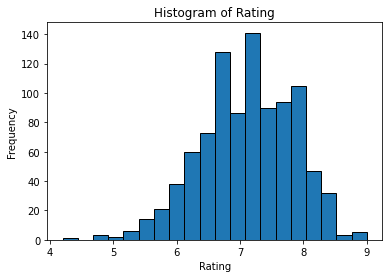

In [194]:
plt.hist(df1['Rating'], bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Rating')
plt.show()

#### From above visualization i get to know that
Most of movies having rating of 7 - 7.3

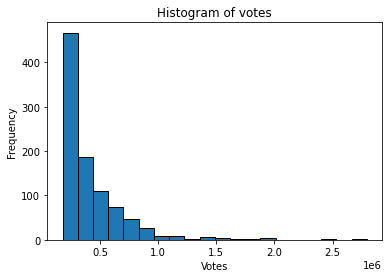

In [195]:
plt.hist(df1['Votes'], bins=20, edgecolor='k')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.title('Histogram of votes')
plt.show()

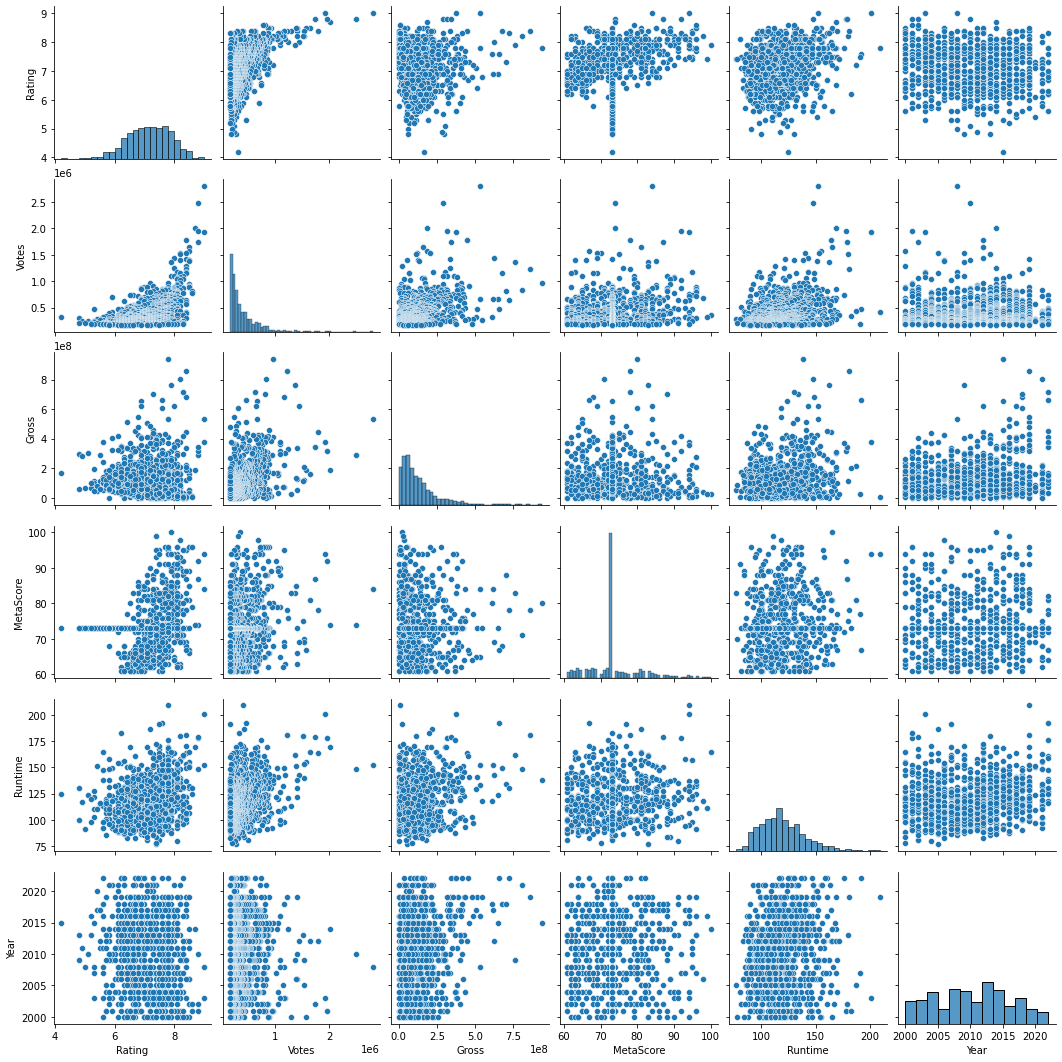

In [196]:
# Create a pair plot for selected numerical columns
sns.pairplot(df1[['Rating', 'Votes', 'Gross', 'MetaScore','Runtime', 'Year']])
plt.show()


#### Reviews from above scatterplot

1. No negative relation.
2. 'Gross', 'MetaScore','Runtime', 'Year' have postive relation with target variable  Rating, Votes

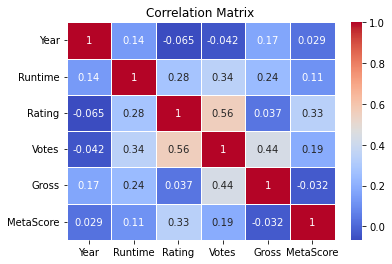

In [197]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

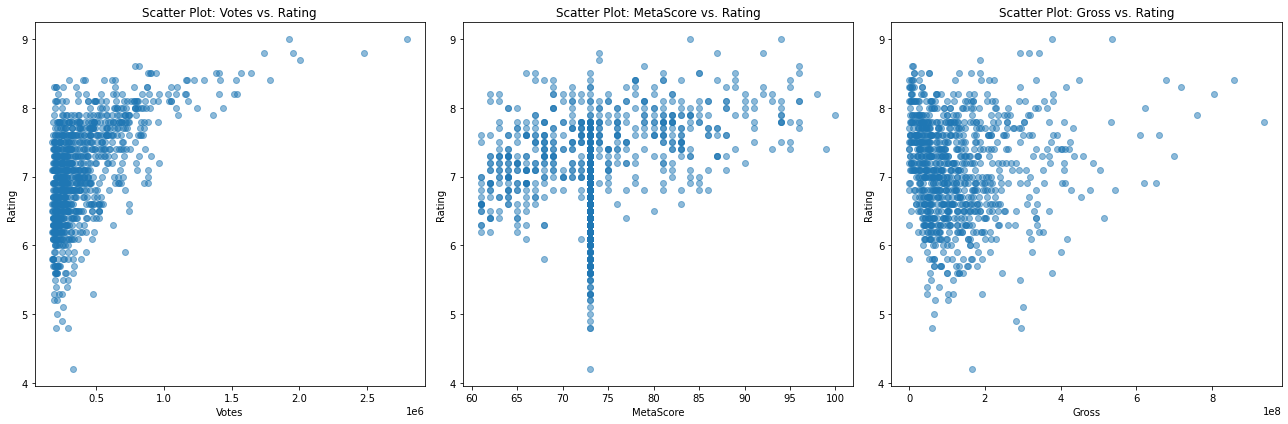

In [198]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df1['Votes'], df1['Rating'], alpha=0.5)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Scatter Plot: Votes vs. Rating')

plt.subplot(1, 3, 2)
plt.scatter(df1['MetaScore'], df1['Rating'], alpha=0.5)
plt.xlabel('MetaScore')
plt.ylabel('Rating')
plt.title('Scatter Plot: MetaScore vs. Rating')

plt.subplot(1, 3, 3)
plt.scatter(df1['Gross'], df1['Rating'], alpha=0.5)
plt.xlabel('Gross')
plt.ylabel('Rating')
plt.title('Scatter Plot: Gross vs. Rating')

plt.tight_layout()
plt.show()

#### Review from Scatter plot
1. No negative relation


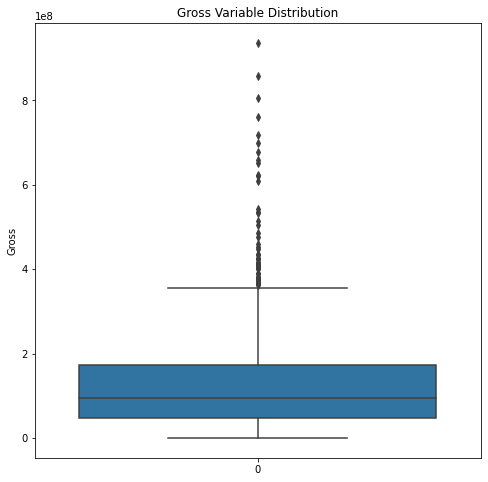

In [199]:
plt.figure(figsize = [8,8])
sns.boxplot(data=df1['Gross'])
plt.title("Gross Variable Distribution")
plt.ylabel("Gross")
plt.show()

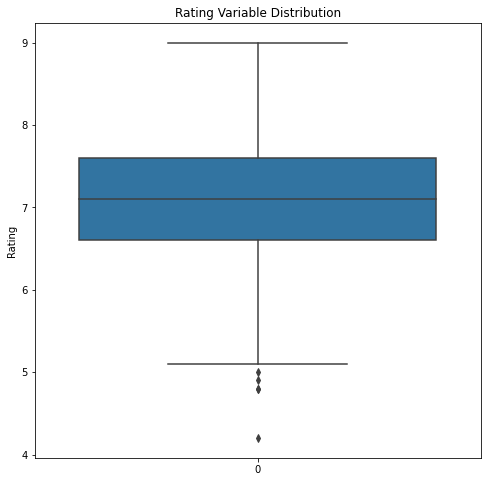

In [200]:
plt.figure(figsize = [8,8])
sns.boxplot(data=df1['Rating'])
plt.title("Rating Variable Distribution")
plt.ylabel("Rating")
plt.show()

## Step 4: Data Preparation

In [201]:
genres = df1['Genre'].str.split(', ', expand=True)
genres = genres.stack().str.get_dummies().sum(level=0)

/var/folders/hl/llrbs5vs0dzg_dcw7n59yd4r0000gn/T/ipykernel_10923/506007763.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres = genres.stack().str.get_dummies().sum(level=0)


In [202]:
# Concatenate the one-hot encoded genres with the original DataFrame
df1 = pd.concat([df1, genres], axis=1)


In [203]:
df1.sample(5)

,Name,Year,Runtime,Genre,Rating,Votes,Director,Gross,MetaScore,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
769,Låt den rätte komma in,2008,114.0,"Drama, Fantasy, Horror",7.8,223900,Tomas Alfredson,2122065.0,82.0,0,...,1,0,0,0,0,0,0,0,0,0
853,Unstoppable,2010,98.0,"Action, Thriller",6.8,204835,Tony Scott,81562942.0,69.0,1,...,0,0,0,0,0,0,0,1,0,0
535,Clash of the Titans,2010,106.0,"Action, Adventure, Fantasy",5.8,289687,Louis Leterrier,163214888.0,73.0,1,...,0,0,0,0,0,0,0,0,0,0
833,13 Going on 30,2004,98.0,"Comedy, Fantasy, Romance",6.3,208126,Gary Winick,57231747.0,73.0,0,...,0,0,0,0,1,0,0,0,0,0
57,Iron Man 2,2010,124.0,"Action, Sci-Fi",6.9,851609,Jon Favreau,312433331.0,73.0,1,...,0,0,0,0,0,1,0,0,0,0


In [204]:
# Select relevant columns for the model
selected_columns = ['Rating'] + list(genres.columns)
df2 = df1[selected_columns]

In [205]:
df1['Rating'] = df1['Rating'].astype(float)

In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 998
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       949 non-null    object 
 1   Year       949 non-null    int64  
 2   Runtime    949 non-null    float64
 3   Genre      949 non-null    object 
 4   Rating     949 non-null    float64
 5   Votes      949 non-null    int64  
 6   Director   949 non-null    object 
 7   Gross      949 non-null    float64
 8   MetaScore  949 non-null    float64
 9   Action     949 non-null    int64  
 10  Adventure  949 non-null    int64  
 11  Animation  949 non-null    int64  
 12  Biography  949 non-null    int64  
 13  Comedy     949 non-null    int64  
 14  Crime      949 non-null    int64  
 15  Drama      949 non-null    int64  
 16  Family     949 non-null    int64  
 17  Fantasy    949 non-null    int64  
 18  History    949 non-null    int64  
 19  Horror     949 non-null    int64  
 20  Music     

In [207]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 998
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rating     949 non-null    float64
 1   Action     949 non-null    int64  
 2   Adventure  949 non-null    int64  
 3   Animation  949 non-null    int64  
 4   Biography  949 non-null    int64  
 5   Comedy     949 non-null    int64  
 6   Crime      949 non-null    int64  
 7   Drama      949 non-null    int64  
 8   Family     949 non-null    int64  
 9   Fantasy    949 non-null    int64  
 10  History    949 non-null    int64  
 11  Horror     949 non-null    int64  
 12  Music      949 non-null    int64  
 13  Musical    949 non-null    int64  
 14  Mystery    949 non-null    int64  
 15  Romance    949 non-null    int64  
 16  Sci-Fi     949 non-null    int64  
 17  Sport      949 non-null    int64  
 18  Thriller   949 non-null    int64  
 19  War        949 non-null    int64  
 20  Western   

## Step 5: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [224]:
# Split the data into training and testing sets
X = df2.drop('Rating', axis=1)  # Independent variables (genres)
y = df2['Rating']  # Dependent variable (rating)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Build a modal

In [225]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [227]:
# scaler = MinMaxScaler()

In [228]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [229]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.4064733032195487


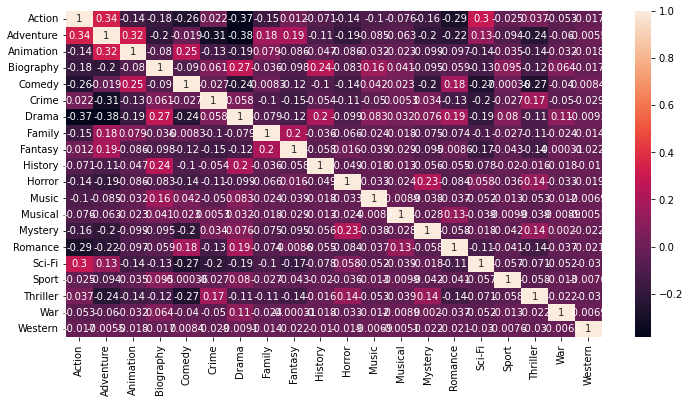

In [230]:
plt.figure(figsize = (12, 6))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [240]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))  # Print the first 10 rows for comparison

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

     Actual  Predicted
201     7.5   7.403070
679     7.8   7.734355
711     6.5   6.967594
759     6.4   6.984169
801     7.2   7.520916
788     7.3   7.811721
853     6.8   6.939600
965     6.7   7.610594
502     7.8   6.738676
174     7.2   7.432496
Root Mean Squared Error: 0.6375525885913638


In [241]:
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs. predicted ratings
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first few rows for comparison
print(comparison.head(10))


     Actual  Predicted
201     7.5   7.403070
679     7.8   7.734355
711     6.5   6.967594
759     6.4   6.984169
801     7.2   7.520916
788     7.3   7.811721
853     6.8   6.939600
965     6.7   7.610594
502     7.8   6.738676
174     7.2   7.432496


In [242]:
def recommend_movies(df, min_rating, genre):
    
    recommended_movies = df[df['Rating'] >= min_rating]
    
    
    if genre:
        recommended_movies = recommended_movies[recommended_movies[genre] == 1]
    
    
    recommended_movies = recommended_movies.sort_values(by='Rating', ascending=False)
    
    return recommended_movies


min_rating_threshold = 7.5  
selected_genre = 'Action'  

recommended_movies = recommend_movies(df1, min_rating_threshold, selected_genre)


print(f"Recommended movies with a minimum rating of {min_rating_threshold} and genre '{selected_genre}':")
for index, row in recommended_movies.iterrows():
    print(f"{row['Name']} ({row['Year']}), Rating: {row['Rating']:.1f}")


Recommended movies with a minimum rating of 7.5 and genre 'Action':
The Dark Knight (2008), Rating: 9.0
The Lord of the Rings: The Return of the King (2003), Rating: 9.0
The Lord of the Rings: The Fellowship of the Ring (2001), Rating: 8.8
The Lord of the Rings: The Two Towers (2002), Rating: 8.8
Inception (2010), Rating: 8.8
Gladiator (2000), Rating: 8.5
Avengers: Endgame (2019), Rating: 8.4
The Dark Knight Rises (2012), Rating: 8.4
Oldeuboi (2003), Rating: 8.4
Avengers: Infinity War (2018), Rating: 8.4
Spider-Man: Into the Spider-Verse (2018), Rating: 8.4
Top Gun: Maverick (2022), Rating: 8.3
Dangal (2016), Rating: 8.3
Kill Bill: Vol. 1 (2003), Rating: 8.2
V for Vendetta (2005), Rating: 8.2
1917 (2019), Rating: 8.2
Batman Begins (2005), Rating: 8.2
Spider-Man: No Way Home (2021), Rating: 8.2
Rush (2013), Rating: 8.1
How to Train Your Dragon (2010), Rating: 8.1
Logan (2017), Rating: 8.1
Ford v Ferrari (2019), Rating: 8.1
Warrior (2011), Rating: 8.1
Mad Max: Fury Road (2015), Rating: 8